# K-means Clustering without sklearn (library)

we have to use python. but can't using sklearn, scipy

Eigenvalue



In [ ]:
# google drive. so we have to monunt
from google.colab import drive # /content/drive/MyDrive/project/MachineLearning/dataset/mnist.pkl
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# load data. I load 
import six.moves.cPickle as pickle
import gzip
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import random
import seaborn as sns

In [ ]:
def load_data(dataset): # data load : HDLMS source code utilize
    data_dir, data_file = os.path.split(dataset)
    if data_dir == "" and not os.path.isfile(dataset):
        # Check if dataset is in the data directory.
        new_path = os.path.join(
            os.path.split('/content/drive/MyDrive/project/MachineLearning/dataset/')[0],
            dataset
        )
        if os.path.isfile(new_path) or data_file == 'mnist.pkl.gz':
            dataset = new_path

    if (not os.path.isfile(dataset)) and data_file == 'mnist.pkl.gz':
        from six.moves import urllib
        origin = (
            'http://www.iro.umontreal.ca/~lisa/deep/data/mnist/mnist.pkl.gz'
        )
        print('Downloading data from %s' % origin)
        urllib.request.urlretrieve(origin, dataset)

    print('... loading data')

    # Load the dataset
    with gzip.open(dataset, 'rb') as f:
        try:
            train_set, valid_set, test_set = pickle.load(f, encoding='latin1')
        except:
            train_set, valid_set, test_set = pickle.load(f)
    # train_set, valid_set, test_set format: tuple(input, target)
    # input is a numpy.ndarray of 2 dimensions (a matrix)
    # where each row corresponds to an example. target is a
    # numpy.ndarray of 1 dimension (vector) that has the same length as
    # the number of rows in the input. It should give the target
    # to the example with the same index in the input.

    return train_set, valid_set, test_set

In [ ]:
if __name__ == '__main__':
    train_set, val_set, test_set = load_data('mnist.pkl.gz')

    train_x, train_y = train_set
    val_x, val_y = val_set
    test_x, test_y = test_set
    
    print(train_x.shape)
    print(train_y.shape)

... loading data
(50000, 784)
(50000,)


In [ ]:
# 3 and 9
train_x = train_x[np.where((train_y == 3) | (train_y == 9))]

train_y = train_y[np.where((train_y == 3) | (train_y == 9))]


In [ ]:
print(train_x.shape)
print(train_y.shape) # shape

(10089, 784)
(10089,)


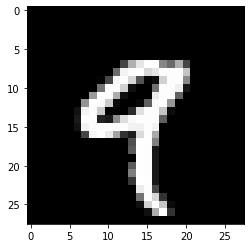

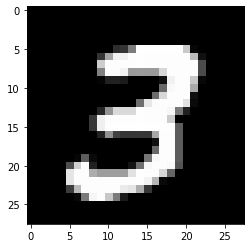

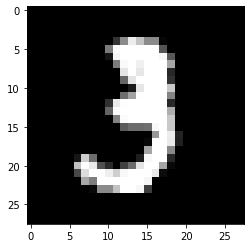

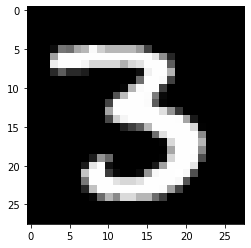

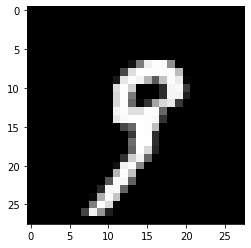

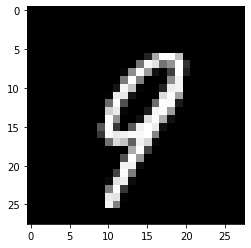

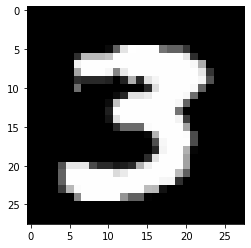

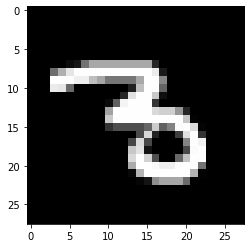

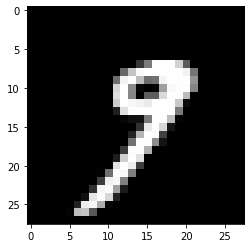

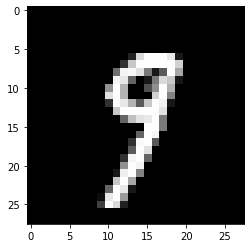

In [ ]:
for i in range(10):
  plt.imshow(train_x[i].reshape((28, 28)), cmap=cm.Greys_r)
  plt.show()

Text(0.5, 1.0, '3 and 9 figure prob density graph')

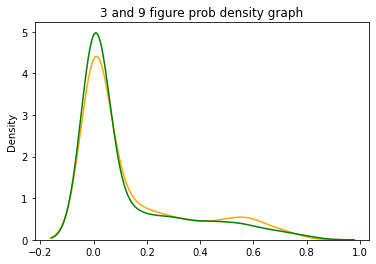

In [ ]:
sns.kdeplot(np.mean(train_x[train_y==3], axis=0), color='orange', label='3')
sns.kdeplot(np.mean(train_x[train_y==9], axis=0), color='green', label='9')
plt.title("3 and 9 figure prob density graph")

In [ ]:
xmeaned = train_x - np.mean(train_x, axis = 0)

In [ ]:
cov_mat = np.cov(xmeaned , rowvar = False) # covariance matrix

In [ ]:
cov = train_x.T.dot(train_x) / train_x.shape[0]
meanX = train_x.T.mean(1).reshape((-1, 1))
meanY = train_x.mean(0).reshape((-1, 1))
_cov = cov - meanX.dot(meanY.T)
eigval, eigvec = np.linalg.eig(_cov)

In [ ]:
def basisEigenvector(t, x, n):
    eigen_vec = np.zeros([t.shape[0], n])
    for i in range(t.shape[0]):
        eigen_vec[i] = t[i].dot(eigen_vec.T[:n].T)
        
    return eigen_vec
    

The covariance matrix is a square matrix denoting the covariance of the elements with each other. The covariance of an element with itself is nothing but just its Variance.

The Eigenvectors of the Covariance matrix we get are Orthogonal to each other and each vector represents a principal axis.

A Higher Eigenvalue corresponds to a higher variability. Hence the principal axis with the higher Eigenvalue will be an axis capturing higher variability in the data.

Orthogonal means the vectors are mutually perpendicular to each other. Eigenvalues and vectors seem to be very scary until we get the idea and concepts behind it.


In [ ]:
print(eigvec) 

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


Sort the Eigenvalues in the descending order along with their corresponding Eigenvector.

Remember each column in the Eigen vector-matrix corresponds to a principal component, so arranging them in descending order of their Eigenvalue will automatically arrange the principal component in descending order of their variability.

Hence the first column in our rearranged Eigen vector-matrix will be a principal component that captures the highest variability

In [ ]:
#sort the eigenvalues in descending order
sorted_index = np.argsort(eigval)[::-1]
sorted_eigenvalue = eigval[sorted_index]
#similarly sort the eigenvectors 
sorted_eigenvectors = eigvec[:,sorted_index]

In [ ]:
print(sorted_eigenvalue)

[ 7.50613356e+00  4.06700754e+00  2.97603083e+00  2.33182478e+00
  2.20681167e+00  1.78681195e+00  1.25662518e+00  1.11804283e+00
  1.10515046e+00  1.05201054e+00  8.81372452e-01  8.58124375e-01
  8.05291176e-01  7.47862160e-01  6.83046997e-01  6.27147198e-01
  5.96485972e-01  5.75562060e-01  5.45408309e-01  5.06030142e-01
  4.58409965e-01  4.48268741e-01  4.35062677e-01  3.94337684e-01
  3.56763780e-01  3.52030039e-01  3.35922748e-01  3.32786798e-01
  3.21336746e-01  2.95555681e-01  2.78673798e-01  2.63870448e-01
  2.54226536e-01  2.49852344e-01  2.38084987e-01  2.32365400e-01
  2.24926889e-01  2.01889426e-01  1.99623346e-01  1.90259576e-01
  1.80254698e-01  1.79062024e-01  1.74144268e-01  1.72148719e-01
  1.66960329e-01  1.66104868e-01  1.53214842e-01  1.48177609e-01
  1.46750063e-01  1.43077001e-01  1.36610776e-01  1.33889064e-01
  1.29096031e-01  1.27204478e-01  1.19941890e-01  1.15842693e-01
  1.15259968e-01  1.08200237e-01  1.02983959e-01  1.01834364e-01
  9.81848240e-02  9.49919

In [ ]:
print(sorted_eigenvectors)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
# select the first n eigenvectors, n is desired dimension
# of our final reduced data.
 
n_components = 2 #you can select any number of components.
eigenvector_subset = sorted_eigenvectors[:,0:n_components]

In [ ]:
print(eigenvector_subset)

[[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]]


transform the data by having a dot product between the Transpose of the Eigenvector subset and the Transpose of the mean-centered data. By transposing the outcome of the dot product, the result we get is the data reduced to lower dimensions from higher dimensions.

In [ ]:
#Transform the data 
X_reduced = np.dot(eigenvector_subset.transpose(), xmeaned.transpose()).transpose()
print(X_reduced)

[[ 3.7623615  -0.68824476]
 [-1.765748   -2.3798196 ]
 [-2.7066834  -1.793794  ]
 ...
 [ 3.2541673   2.5093985 ]
 [-1.4980292  -0.39551228]
 [ 2.8278072  -0.23264377]]


In [ ]:
import pandas as pd

principal_df = pd.DataFrame(X_reduced, columns = ['PC1','PC2'])

In [ ]:
principal_df.head()

,PC1,PC2
0,3.762362,-0.688245
1,-1.765748,-2.379820
2,-2.706683,-1.793794
3,-4.993855,2.557027
4,1.415055,-2.244182


In [ ]:
target = pd.DataFrame(train_x)

In [ ]:
target.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.574219,0.984375,0.164062,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Concat it with target variable to create a complete Dataset
principal_dfn = pd.concat([principal_df , pd.DataFrame(target)] , axis = 1)

In [ ]:
m = X_reduced.shape[0] #number of training examples
n=X_reduced.shape[1] #number of features. Here n=2
n_iter=100

In [ ]:
Centroids=np.array([]).reshape(n,0) # Initialize the centroids randomly from the data points:
K = 2

import random as rd

In [ ]:
for i in range(K):
    rand=rd.randint(0,m-1)
    Centroids=np.c_[Centroids, X_reduced[rand]] # Centroids is a n x K dimentional matrix, where each column will be a centroid for one cluster.


Randomly initialize the cluster centers of each cluster from the data points. In fact, random initialization is not an efficient way to start with, as sometimes it leads to increased numbers of required clustering iterations to reach convergence, a greater overall runtime, and a less-efficient algorithm overall.

In [ ]:
out = {}

EuclidianDistance=np.array([]).reshape(m,0)
for k in range(K):
       tempDist=np.sum((X_reduced-Centroids[:,k])**2,axis=1)
       EuclidianDistance = np.c_[EuclidianDistance,tempDist]
C=np.argmin(EuclidianDistance,axis=1)+1
# We find the euclidian distance from each point to all the centroids and store in a m X K matrix.
# So every row in EuclidianDistance matrix will have distances of that particular data point from all the centroids

the euclidian distance from the centroid and assign the cluster based on the minimal distance
The output of our algorithm should be a dictionary with cluster number as Keys and the data points which belong to that cluster as values.

In [ ]:
Y={}
for k in range(K):
    Y[k+1]=np.array([]).reshape(2,0)
for i in range(m):
    Y[C[i]]=np.c_[Y[C[i]], X_reduced[i]]
     
for k in range(K):
    Y[k+1]=Y[k+1].T
    
for k in range(K):
     Centroids[:,k]=np.mean(Y[k+1],axis=0) #Y is a temporary dictionary which stores the solution for one particular iteration.

In [ ]:
for i in range(n_iter):
     #step 2.a
      EuclidianDistance=np.array([]).reshape(m,0)
      for k in range(K):
          tempDist=np.sum((X_reduced - Centroids[:,k])**2,axis=1)
          EuclidianDistance=np.c_[EuclidianDistance,tempDist]
      C=np.argmin(EuclidianDistance,axis=1)+1
     #step 2.b
      Y={}
      for k in range(K):
          Y[k+1]=np.array([]).reshape(2,0)
      for i in range(m):
          Y[C[i]]=np.c_[Y[C[i]], X_reduced[i]]
     
      for k in range(K):
          Y[k+1]=Y[k+1].T
    
      for k in range(K):
          Centroids[:,k]=np.mean(Y[k+1],axis=0)
      Output=Y
# we loop over n_iter and repeat

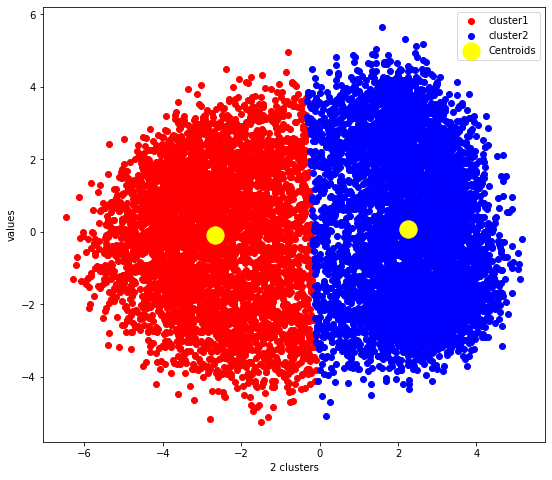

In [ ]:
color=['red','blue','green','cyan','magenta']
labels=['cluster1','cluster2']
plt.figure(figsize=(9, 8))
for k in range(K):
    plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k])
plt.scatter(Centroids[0,:],Centroids[1,:],s=300,c='yellow',label='Centroids')
plt.xlabel('2 clusters')
plt.ylabel('values')
plt.legend()
plt.show()


In [ ]:
Centroids=np.array([]).reshape(n,0)
K = 5

import random as rd

In [ ]:
for i in range(K):
    rand=rd.randint(0,m-1)
    Centroids=np.c_[Centroids, X_reduced[rand]]

In [ ]:
out = {}

EuclidianDistance=np.array([]).reshape(m,0)
for k in range(K):
       tempDist=np.sum((X_reduced-Centroids[:,k])**2,axis=1)
       EuclidianDistance = np.c_[EuclidianDistance,tempDist]
C=np.argmin(EuclidianDistance,axis=1)+1

In [ ]:
Y={}
for k in range(K):
    Y[k+1]=np.array([]).reshape(2,0)
for i in range(m):
    Y[C[i]]=np.c_[Y[C[i]], X_reduced[i]]
     
for k in range(K):
    Y[k+1]=Y[k+1].T
    
for k in range(K):
     Centroids[:,k]=np.mean(Y[k+1],axis=0)

In [ ]:
for i in range(n_iter):
     #step 2.a
      EuclidianDistance=np.array([]).reshape(m,0)
      for k in range(K):
          tempDist=np.sum((X_reduced - Centroids[:,k])**2,axis=1)
          EuclidianDistance=np.c_[EuclidianDistance,tempDist]
      C=np.argmin(EuclidianDistance,axis=1)+1
     #step 2.b
      Y={}
      for k in range(K):
          Y[k+1]=np.array([]).reshape(2,0)
      for i in range(m):
          Y[C[i]]=np.c_[Y[C[i]], X_reduced[i]]
     
      for k in range(K):
          Y[k+1]=Y[k+1].T
    
      for k in range(K):
          Centroids[:,k]=np.mean(Y[k+1],axis=0)
      Output=Y

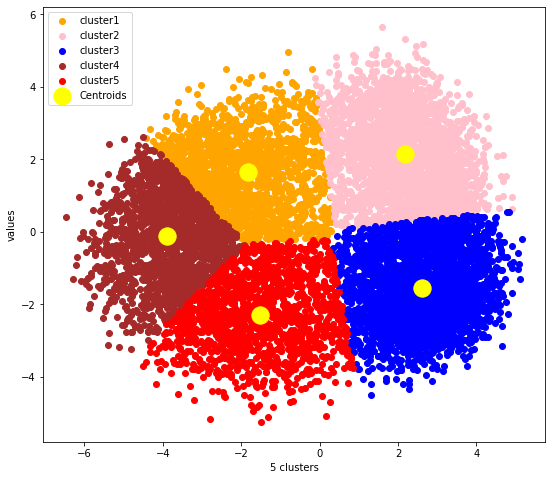

In [ ]:
color=["orange","pink","blue","brown","red","grey","green"]
labels=['cluster1','cluster2','cluster3','cluster4','cluster5']
plt.figure(figsize=(9, 8))
for k in range(K):
    plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k])
plt.scatter(Centroids[0,:],Centroids[1,:],s=300,c='yellow',label='Centroids')
plt.xlabel('5 clusters')
plt.ylabel('values')
plt.legend()
plt.show()

In [ ]:
def kmeans(k, x, no_iter=100, optimized=True):
    total_loss = []
    
    # Initial point random initialization
    clusterCenter = np.random.random([k, x.shape[-1]])
    
    # Calculate the distance of each point to all cluster centers
    dist = np.zeros([k, x.shape[0]])
    

    cur = 0
    while (cur < no_iter):
        for idx, center in enumerate(clusterCenter):
            dist[idx] = np.sum(np.square(np.subtract(np.broadcast_to(center, x.shape), x)), axis=1) 
        # argmin center
        labels = np.argmin(dist, axis=0)
        loss = 0

        for idx in range(k):
            if x[labels == idx].shape[0] == 0:
                clusterCenter = np.random.random([k, x.shape[-1]])
                cur = -1
                break
            # Calculate Loss 
            loss += np.sum(dist[idx][labels == idx])
            # Update cluster centers
            clusterCenter[idx] = np.average(x[labels == idx], axis=0) 
        if cur >= 0:
            total_loss.append(loss)
        if optimized and cur > 1 and (total_loss[-1] == total_loss[-2]):
            break
        cur += 1
        
    print('Iterations: {}'.format(len(total_loss)))
    
    return clusterCenter, labels, total_loss
    
    

Iterations: 16
Loss: [2348774.4963463205, 462729.75273886486, 452404.1565397234, 446297.803415206, 438695.08989029366, 430642.336708387, 422869.393216466, 417644.2090590254, 416537.1766933041, 416438.0564088898, 416426.56501013483, 416423.3808791643, 416423.0330812867, 416423.00695944123, 416422.9924476342, 416422.9924476342]
Loss: [2348774.4963463205, 462729.75273886486, 452404.1565397234, 446297.803415206, 438695.08989029366, 430642.336708387, 422869.393216466, 417644.2090590254, 416537.1766933041, 416438.0564088898, 416426.56501013483, 416423.3808791643, 416423.0330812867, 416423.00695944123, 416422.9924476342, 416422.9924476342]
Iterations: 33
Loss: [2336058.203615956, 437090.18835011293, 385855.67388108873, 372568.9023240651, 367218.1506659196, 364192.76529596234, 362497.67619495984, 361488.6751706803, 360944.751797187, 360676.4496666292, 360576.938664217, 360508.227625956, 360450.7126338578, 360409.122231271, 360377.2458692895, 360347.9799874519, 360331.43992171565, 360321.971458

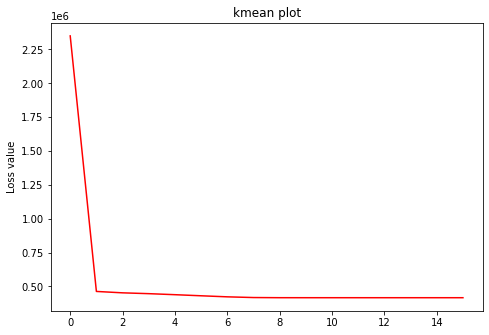

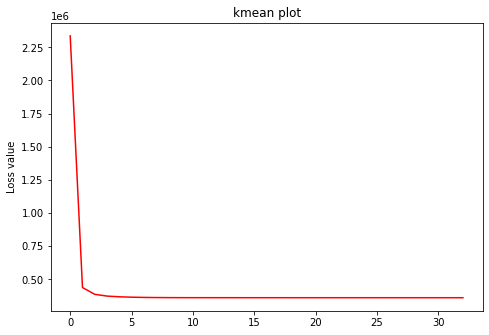

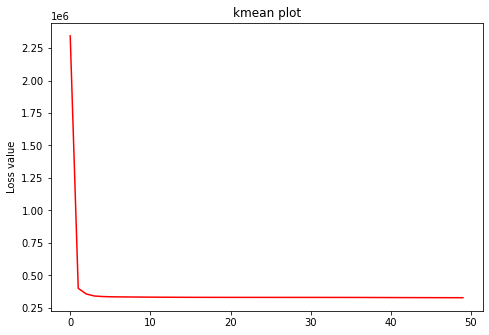

In [ ]:
k = [2, 5, 10] # 2, 5, 10 / not 3
for i in k:
  cluster, label, loss = kmeans(i, train_x, no_iter = 50)
  for j in range(i):
    print('Loss: {}'.format(loss), end = '\n')

  fig = plt.figure()
  axe = fig.add_axes([1, 1, 1, 1])
  plt.plot(loss, color = 'red')
  plt.title('kmean plot')
  plt.ylabel('Loss value')

Iterations: 11
Iterations: 33
Iterations: 50


<Figure size 432x288 with 0 Axes>

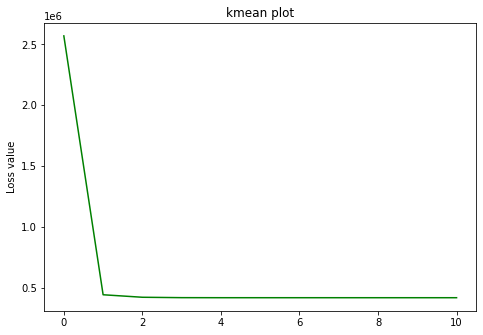

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

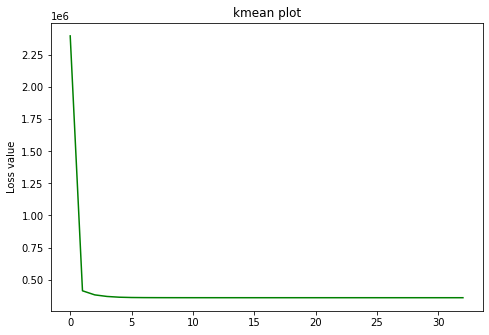

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

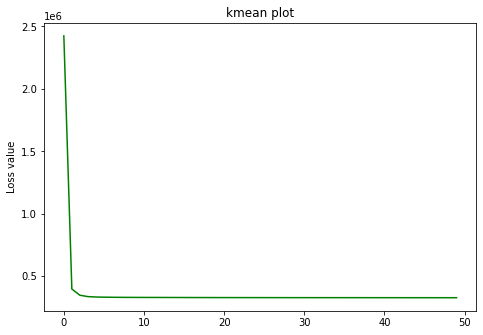

In [ ]:
d = [2, 5, 10]
for k in d:
    cluster, labels, loss = kmeans(k, train_x, no_iter=50)
    for i in range(k):
        
     fig = plt.figure()
    axe = fig.add_axes([1, 1, 1, 1])
    
    plt.plot(loss, color = "green")
    plt.title('kmean plot')
    plt.ylabel('Loss value')

In [ ]:
for eig in [2]:
    x = basisEigenvector(train_x, train_x, eig)
    d = [2, 5, 10]
    for k in d:
        cluster, labels, loss = kmeans(k, data, no_iter=50)
        fig = plt.figure  
        #labels = ['+', 'x']
        colors = ['r', 'b', 'g', 'm', 'pink','y', 'k', 'olive', 'plum', 'tomato']

        for i in range(k):
            c = colors[i]
            plt.plot(x[labels == i][:, 0], x[labels == i][:, 1], '.', c=c)
            plt.plot(cluster[i, 0], cluster[i, 1], 'ko')
        

In [ ]:
        
 for eig in [5, 10]:
    data = To_eigenvector(train_x, train_x, eig)
    pca_data = To_eigenvector(data, data, 2)
    
    for k in [2,5,10]:
        cluster, labels, loss = kmeans(k, data, no_iter=50)
        pca_cluster = To_eigenvector(cluster, data, 2)
        fig = plt.figure
        colors = ['r', 'b', 'g', 'm', 'pink', 'y', 'k', 'olive', 'plum', 'tomato']
             
        for i in range(k):
            c = colors[i]
            plt.plot(pca_data[labels == i][:,0], pca_data[labels == i][:,1], '.', c=c)
            plt.plot(pca_cluster[i,0], pca_cluster[i,1], 'ko')
          

In [ ]:

class K_Means:
	def __init__(self, k =10, tolerance = 0.0001, max_iterations = 500):
		self.k = k
		self.tolerance = tolerance
		self.max_iterations = max_iterations

	def fit(self, data):

		self.centroids = {}

		#initialize the centroids, the first 'k' elements in the dataset will be our initial centroids
		for i in range(self.k):
			self.centroids[i] = data[i]

		#begin iterations
		for i in range(self.max_iterations):
			self.classes = {}
			for i in range(self.k):
				self.classes[i] = []

			#find the distance between the point and cluster; choose the nearest centroid
			for features in data:
				distances = [np.linalg.norm(features - self.centroids[centroid]) for centroid in self.centroids]
				classification = distances.index(min(distances))
				self.classes[classification].append(features)

			previous = dict(self.centroids)

			#average the cluster datapoints to re-calculate the centroids
			for classification in self.classes:
				self.centroids[classification] = np.average(self.classes[classification], axis = 0)

			isOptimal = True

			for centroid in self.centroids:

				original_centroid = previous[centroid]
				curr = self.centroids[centroid]

				if np.sum((curr - original_centroid)/original_centroid * 100.0) > self.tolerance:
					isOptimal = False

			#break out of the main loop if the results are optimal, ie. the centroids don't change their positions much(more than our tolerance)
			if isOptimal:
				break

	def pred(self, data):
		distances = [np.linalg.norm(data - self.centroids[centroid]) for centroid in self.centroids]
		classification = distances.index(min(distances))
		return classification

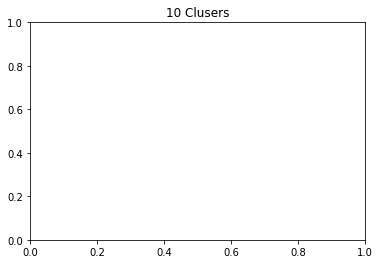

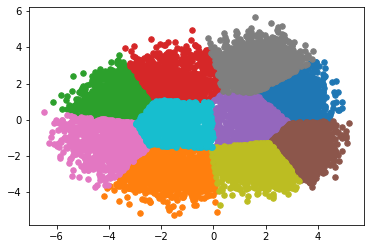

In [ ]:
def main():

	dataset = principal_df.astype(float).values.tolist()

	X = principal_df.values #returns a numpy array
	
	km = K_Means(10)
	km.fit(X)

	# Plotting starts here
	colors = 10*['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', 
              '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

	for centroid in km.centroids:
		plt.scatter(km.centroids[centroid][0], km.centroids[centroid][1], s = 300, label = 'Centroids')

	for classification in km.classes:
		color = colors[classification]
		for features in km.classes[classification]:
			plt.scatter(features[0], features[1], color = color,s = 30)
plt.title("10 Clusers")
plt.show()


if __name__ == "__main__":
	main()